In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
import matplotlib.font_manager as fm
import itertools
import statsmodels.api as sm 
import random
import datetime

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

In [2]:
delivery = pd.read_csv("./Data_KT/delivery.csv")
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [3]:
#선불 비율을 알아내기 위해 선불 지불만 뽑아보기 
#Setle_Knd_Value = 선불

Setle_Knd_Value = delivery.loc[delivery['SETLE_KND_VALUE'] == 2]
Setle_Knd_Value

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,D0004461,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,...,D0004936,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158317,10672686,2020-06-21,C000285,1,C000285,S0039139,분식,4117310400,경기도,안양시 동안구,...,D0006135,3300,300,13000,2,NaN,2020-06-21 23:42:11,2020-06-21 23:42:25,2020-06-21 23:48:58,NaN
5158318,10672687,2020-06-21,C000130,1,C000130,S0002269,분식,4128112300,경기도,고양시 덕양구,...,D0009720,3500,300,25000,2,NaN,2020-06-21 23:12:17,2020-06-21 23:12:31,2020-06-21 23:19:24,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN


In [4]:
Setle_Knd_Value2 = delivery.loc[delivery['SETLE_KND_VALUE'] == 1]
Setle_Knd_Value2
Setle_Knd_Value2= Setle_Knd_Value2.groupby('PROCESS_DT')['SETLE_KND_VALUE'].sum().reset_index()
Setle_Knd_Value2

,PROCESS_DT,SETLE_KND_VALUE
0,2020-01-01,9220
1,2020-01-02,6438
2,2020-01-03,7941
3,2020-01-04,9304
4,2020-01-05,8921
...,...,...
160,2020-06-10,11836
161,2020-06-11,10709
162,2020-06-12,12298
163,2020-06-20,13264


In [5]:
Setle_Knd_Value3 = delivery.loc[delivery['SETLE_KND_VALUE'] == 3]
Setle_Knd_Value3
Setle_Knd_Value3= Setle_Knd_Value3.groupby('PROCESS_DT')['SETLE_KND_VALUE'].sum().reset_index()
Setle_Knd_Value3

,PROCESS_DT,SETLE_KND_VALUE
0,2020-01-01,9642
1,2020-01-02,8358
2,2020-01-03,9078
3,2020-01-04,10473
4,2020-01-05,10482
...,...,...
160,2020-06-10,8676
161,2020-06-11,8085
162,2020-06-12,9429
163,2020-06-20,10740


In [6]:
 Setle_Knd_Value= Setle_Knd_Value.groupby('PROCESS_DT')['SETLE_KND_VALUE'].sum().reset_index()
Setle_Knd_Value

,PROCESS_DT,SETLE_KND_VALUE
0,2020-01-01,36838
1,2020-01-02,25228
2,2020-01-03,29922
3,2020-01-04,34440
4,2020-01-05,37638
...,...,...
160,2020-06-10,38810
161,2020-06-11,35880
162,2020-06-12,41664
163,2020-06-20,50072


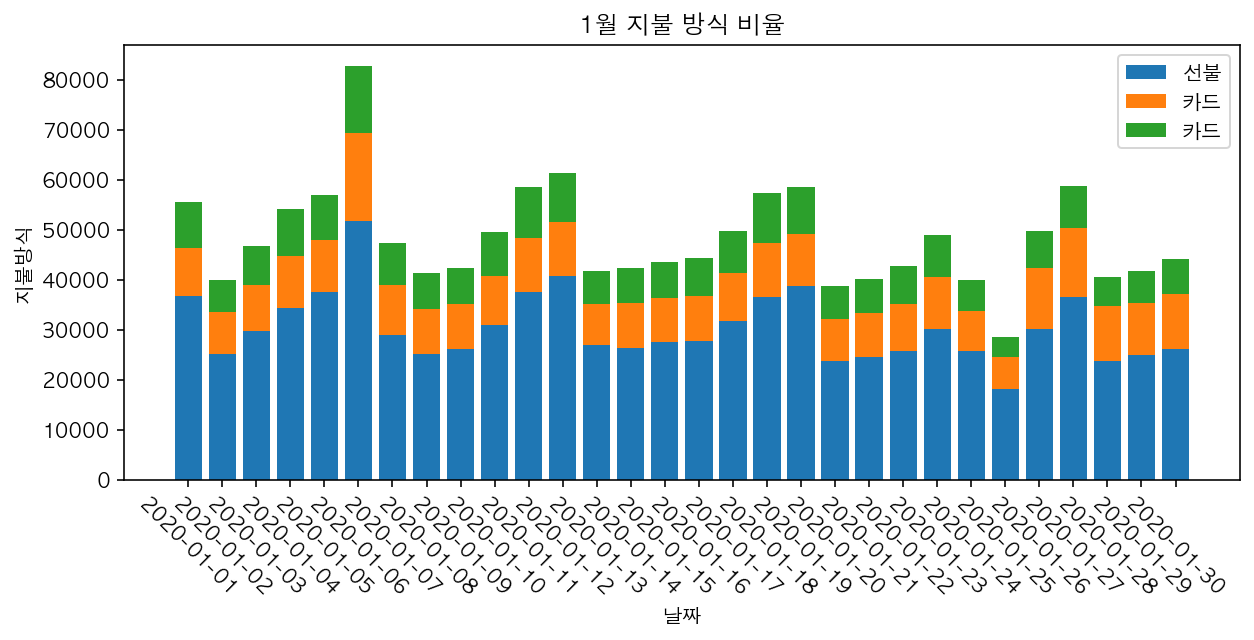

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(Setle_Knd_Value['PROCESS_DT'][:30],Setle_Knd_Value['SETLE_KND_VALUE'][:30], label='선불')
ax.bar(Setle_Knd_Value3['PROCESS_DT'][:30],Setle_Knd_Value3['SETLE_KND_VALUE'][:30], bottom=Setle_Knd_Value['SETLE_KND_VALUE'][:30],label='카드')
ax.bar(Setle_Knd_Value2['PROCESS_DT'][:30],Setle_Knd_Value2['SETLE_KND_VALUE'][:30], 
       bottom=Setle_Knd_Value['SETLE_KND_VALUE'][:30] + Setle_Knd_Value3['SETLE_KND_VALUE'][:30],label='카드')

ax.set_xticklabels(Setle_Knd_Value['PROCESS_DT'], rotation=-45)
ax.set_xlabel('날짜')
ax.set_ylabel('지불방식')
ax.set_title('1월 지불 방식 비율')
ax.legend()
plt.show()




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

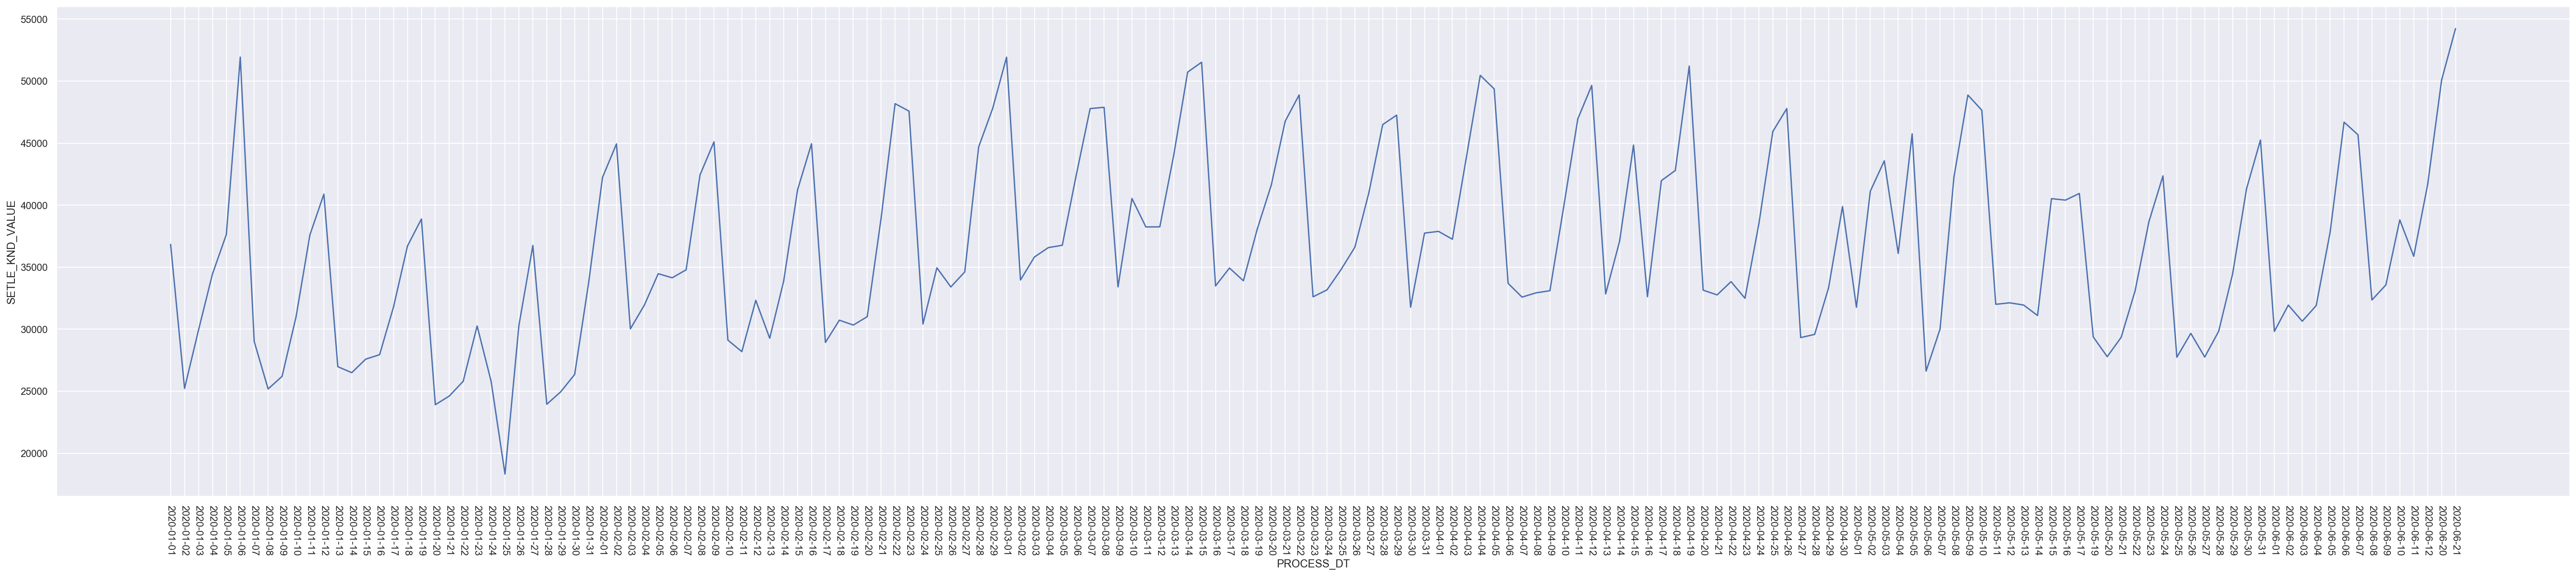

In [8]:
#지불방식 중 선불 지불 변화량입니다.

sns.set(rc={'figure.figsize':(50,10)})
sns.lineplot(x="PROCESS_DT", y="SETLE_KND_VALUE", data=Setle_Knd_Value, palette='pastel')
plt.xticks(rotation = - 90 )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

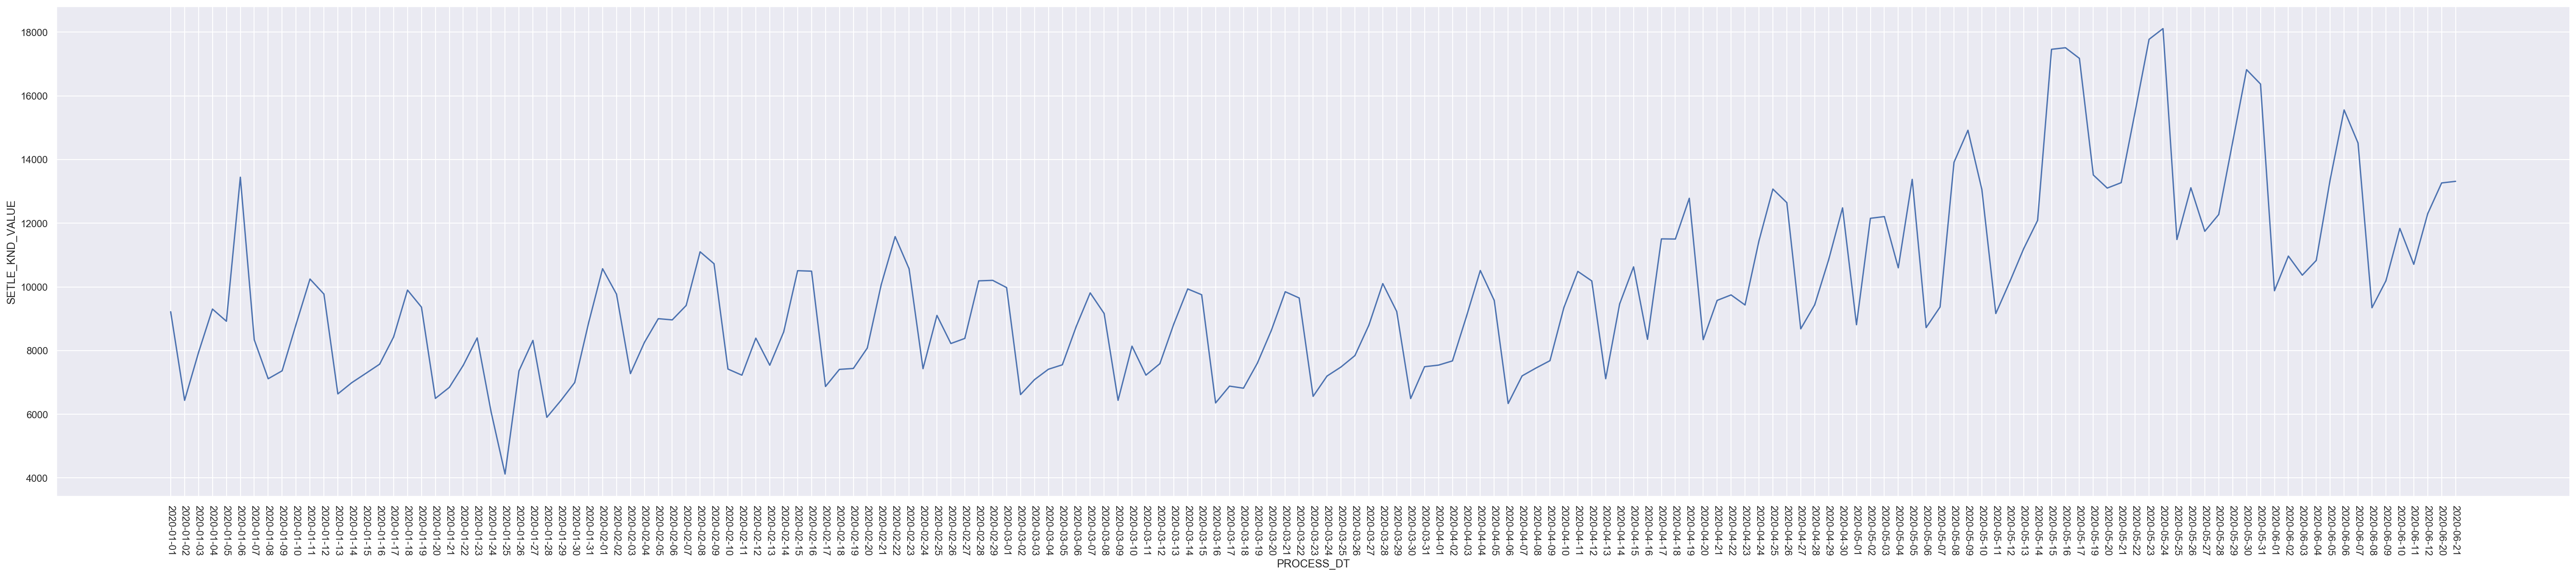

In [9]:
#지불방식 중 카드 지불 변화량입니다.
sns.set(rc={'figure.figsize':(50,10)})
sns.lineplot(x="PROCESS_DT", y="SETLE_KND_VALUE", data=Setle_Knd_Value2, palette='muted')
plt.xticks(rotation = - 90 )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

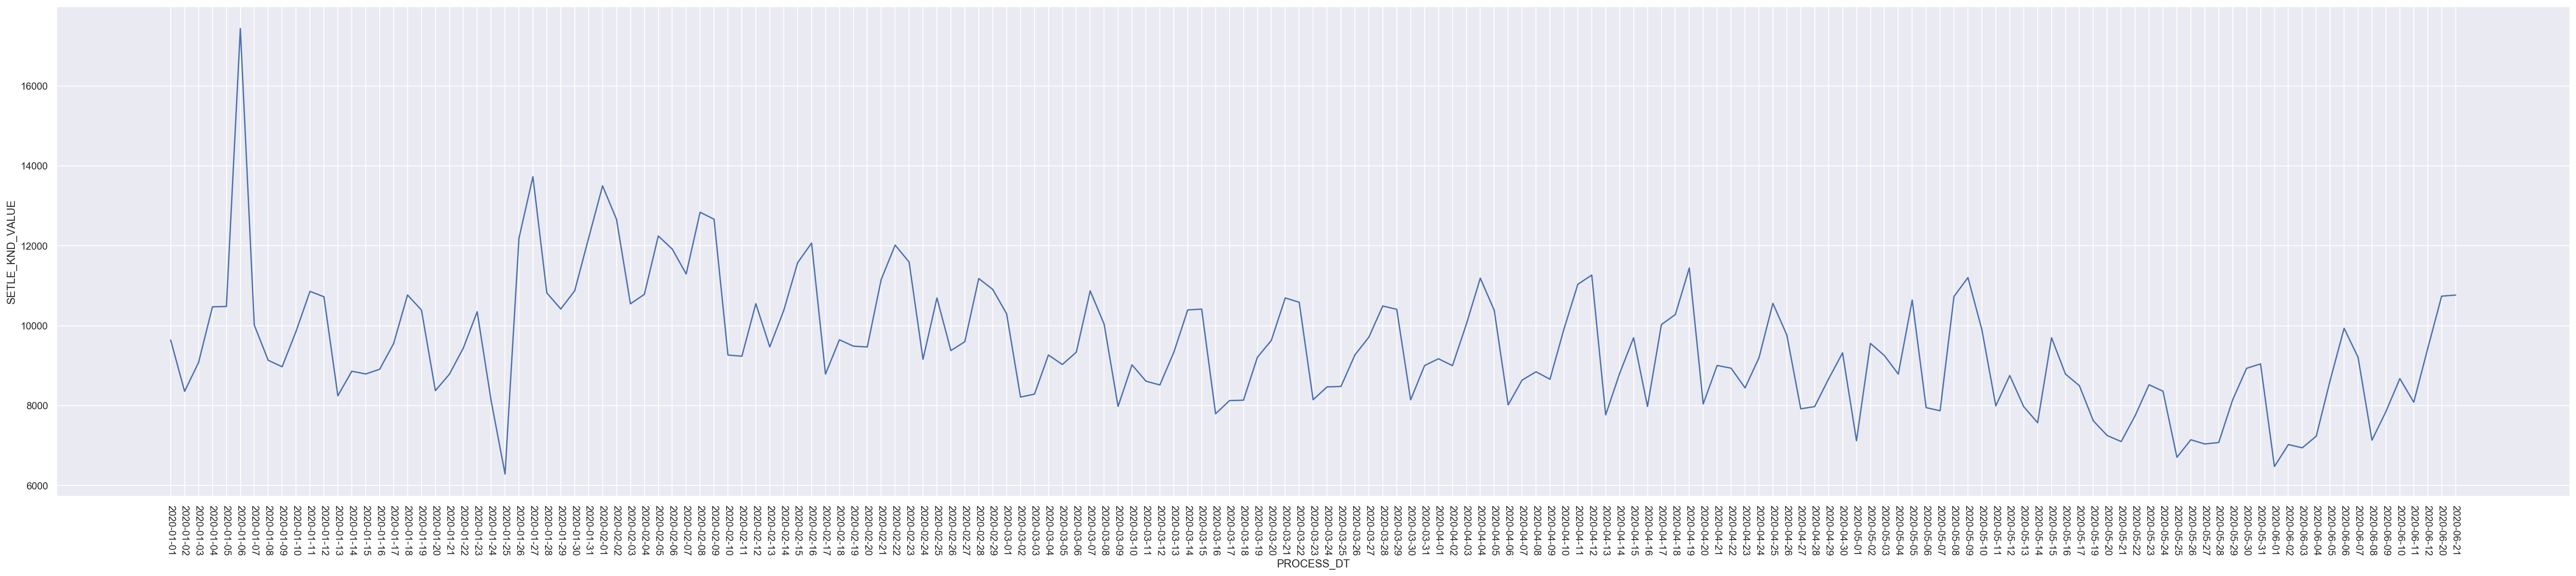

In [10]:
#지불방식 중 현금 지불 변화량입니다.
sns.lineplot(x="PROCESS_DT", y="SETLE_KND_VALUE", data=Setle_Knd_Value3, palette='bright')
plt.xticks(rotation = - 90 )

In [11]:
#코로나가 심해짐에 따라 변화가 있는지 보기 위해 시계열 데이터로 바꾸어줍니다. 

Setle_Knd_Value['PROCESS_DT'] = Setle_Knd_Value['PROCESS_DT'].astype('datetime64[ns]')
idx = pd.to_datetime(Setle_Knd_Value['PROCESS_DT'])
idx

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
160   2020-06-10
161   2020-06-11
162   2020-06-12
163   2020-06-20
164   2020-06-21
Name: PROCESS_DT, Length: 165, dtype: datetime64[ns]

In [12]:
a = list(Setle_Knd_Value['SETLE_KND_VALUE'])
a
ts = Series(a, idx)
ts
type(ts)
ts.index
ts

PROCESS_DT
2020-01-01    36838
2020-01-02    25228
2020-01-03    29922
2020-01-04    34440
2020-01-05    37638
              ...  
2020-06-10    38810
2020-06-11    35880
2020-06-12    41664
2020-06-20    50072
2020-06-21    54232
Length: 165, dtype: int64

In [13]:
y = ts.resample('M').mean()
y
z = ts.resample('W').mean()
z
w= ts.resample('D').mean()
w

PROCESS_DT
2020-01-01    36838.0
2020-01-02    25228.0
2020-01-03    29922.0
2020-01-04    34440.0
2020-01-05    37638.0
               ...   
2020-06-17        NaN
2020-06-18        NaN
2020-06-19        NaN
2020-06-20    50072.0
2020-06-21    54232.0
Freq: D, Length: 173, dtype: float64

In [14]:
df= pd.DataFrame()
df['mean of Advanced payment'] = y
df

df2 =pd.DataFrame()
df2['mean of Advanced payment'] = z
df2

df3=pd.DataFrame()
df3['Advanced payment']=w
df3


,Advanced payment
PROCESS_DT,
2020-01-01,36838.0
2020-01-02,25228.0
2020-01-03,29922.0
2020-01-04,34440.0
2020-01-05,37638.0
...,...
2020-06-17,NaN
2020-06-18,NaN
2020-06-19,NaN


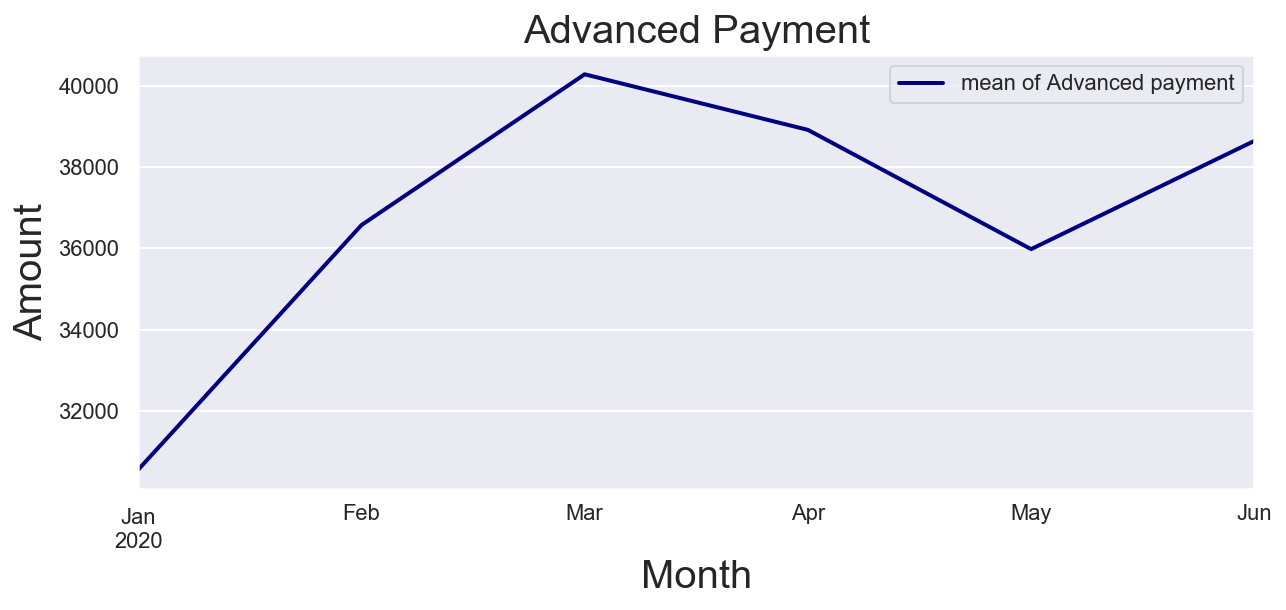

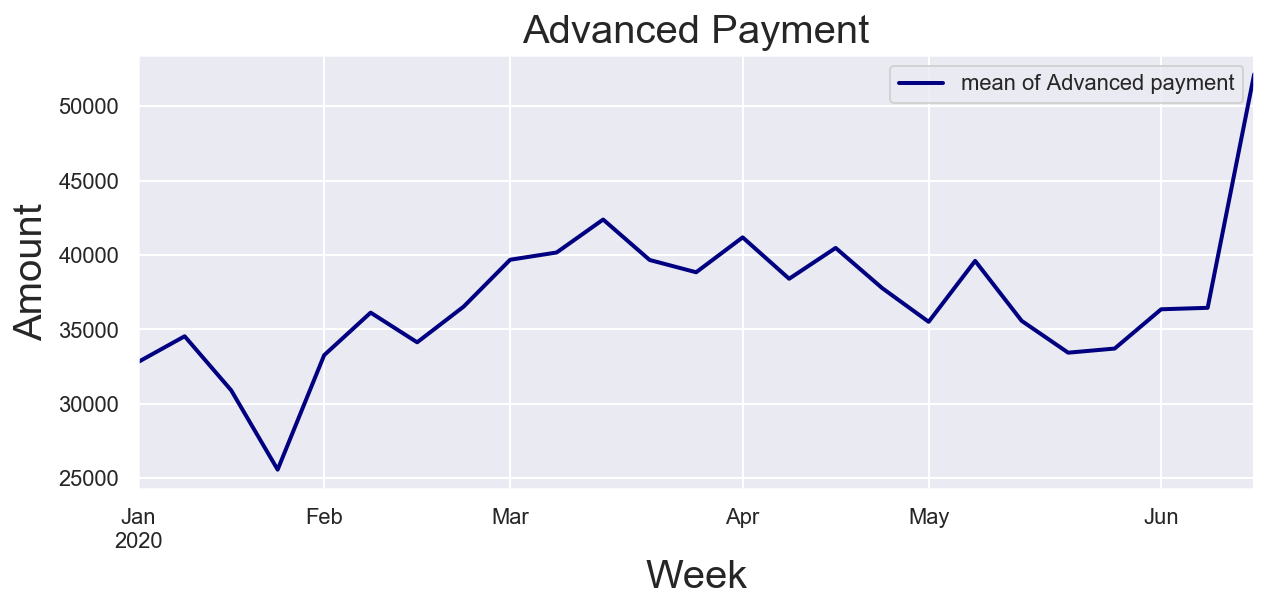

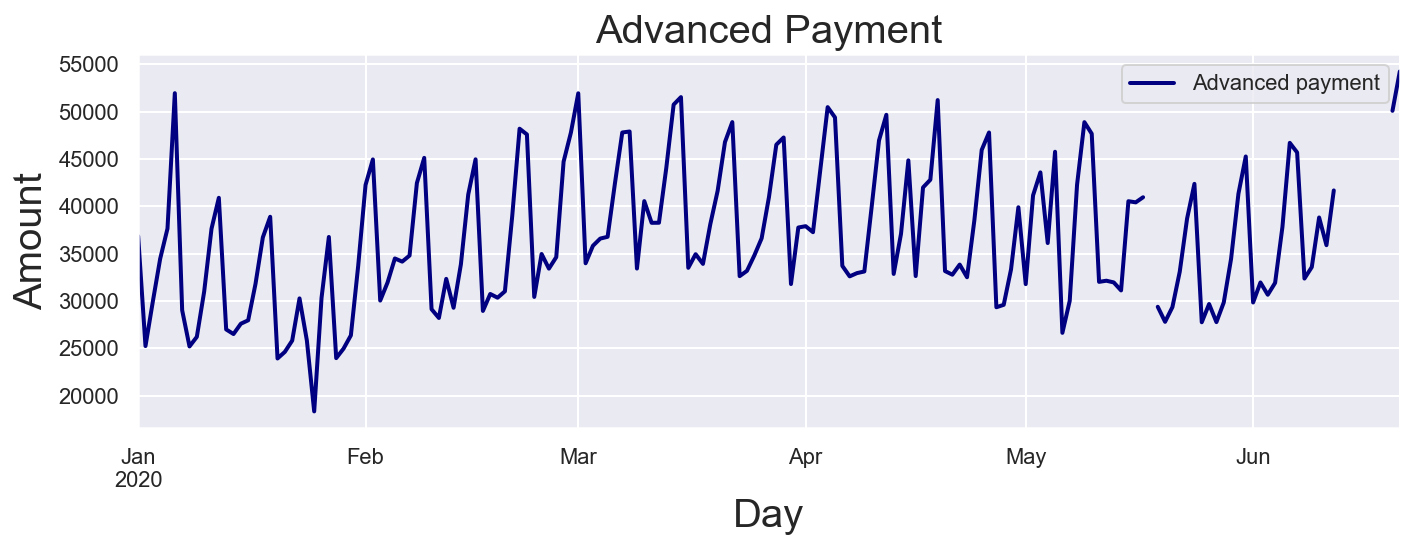

In [15]:

df.plot(figsize = (10,4), linewidth=2, color='navy')
plt.title('Advanced Payment', fontsize= 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Amount', fontsize=20)

plt.show()

df2.plot(figsize = (10,4), linewidth=2, color='navy')
plt.title('Advanced Payment', fontsize= 20)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Amount', fontsize=20)

df3.plot(figsize = (10,4), linewidth=2, color='navy')
plt.title('Advanced Payment', fontsize= 20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Amount', fontsize=20)

plt.tight_layout()
plt.show()


In [16]:
#정부 정책에 따른 변화가 있는지 살펴보고자 합니다. 

policy = pd.read_csv("./Data_KT/Policy.csv")
policy_sd = policy.loc[policy['type']=='Social']
policy_sd

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-02-29,2020-03-21
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
31,32,Korea,Social,Social Distancing Campaign,Weak(1st),2020-05-06,NaN
32,33,Korea,Social,Thanks to Challenge korea,Relay Cheer Campaign in SNS,2020-04-16,NaN


In [17]:
idx = pd.to_datetime(policy_sd['start_date'])
idx

28   2020-02-29
29   2020-03-22
30   2020-04-20
31   2020-05-06
32   2020-04-16
Name: start_date, dtype: datetime64[ns]

In [18]:
a = list(policy_sd['detail'])
a
ts = Series(a, idx)
ts

start_date
2020-02-29                         Strong
2020-03-22                         Strong
2020-04-20                           Weak
2020-05-06                      Weak(1st)
2020-04-16    Relay Cheer Campaign in SNS
dtype: object

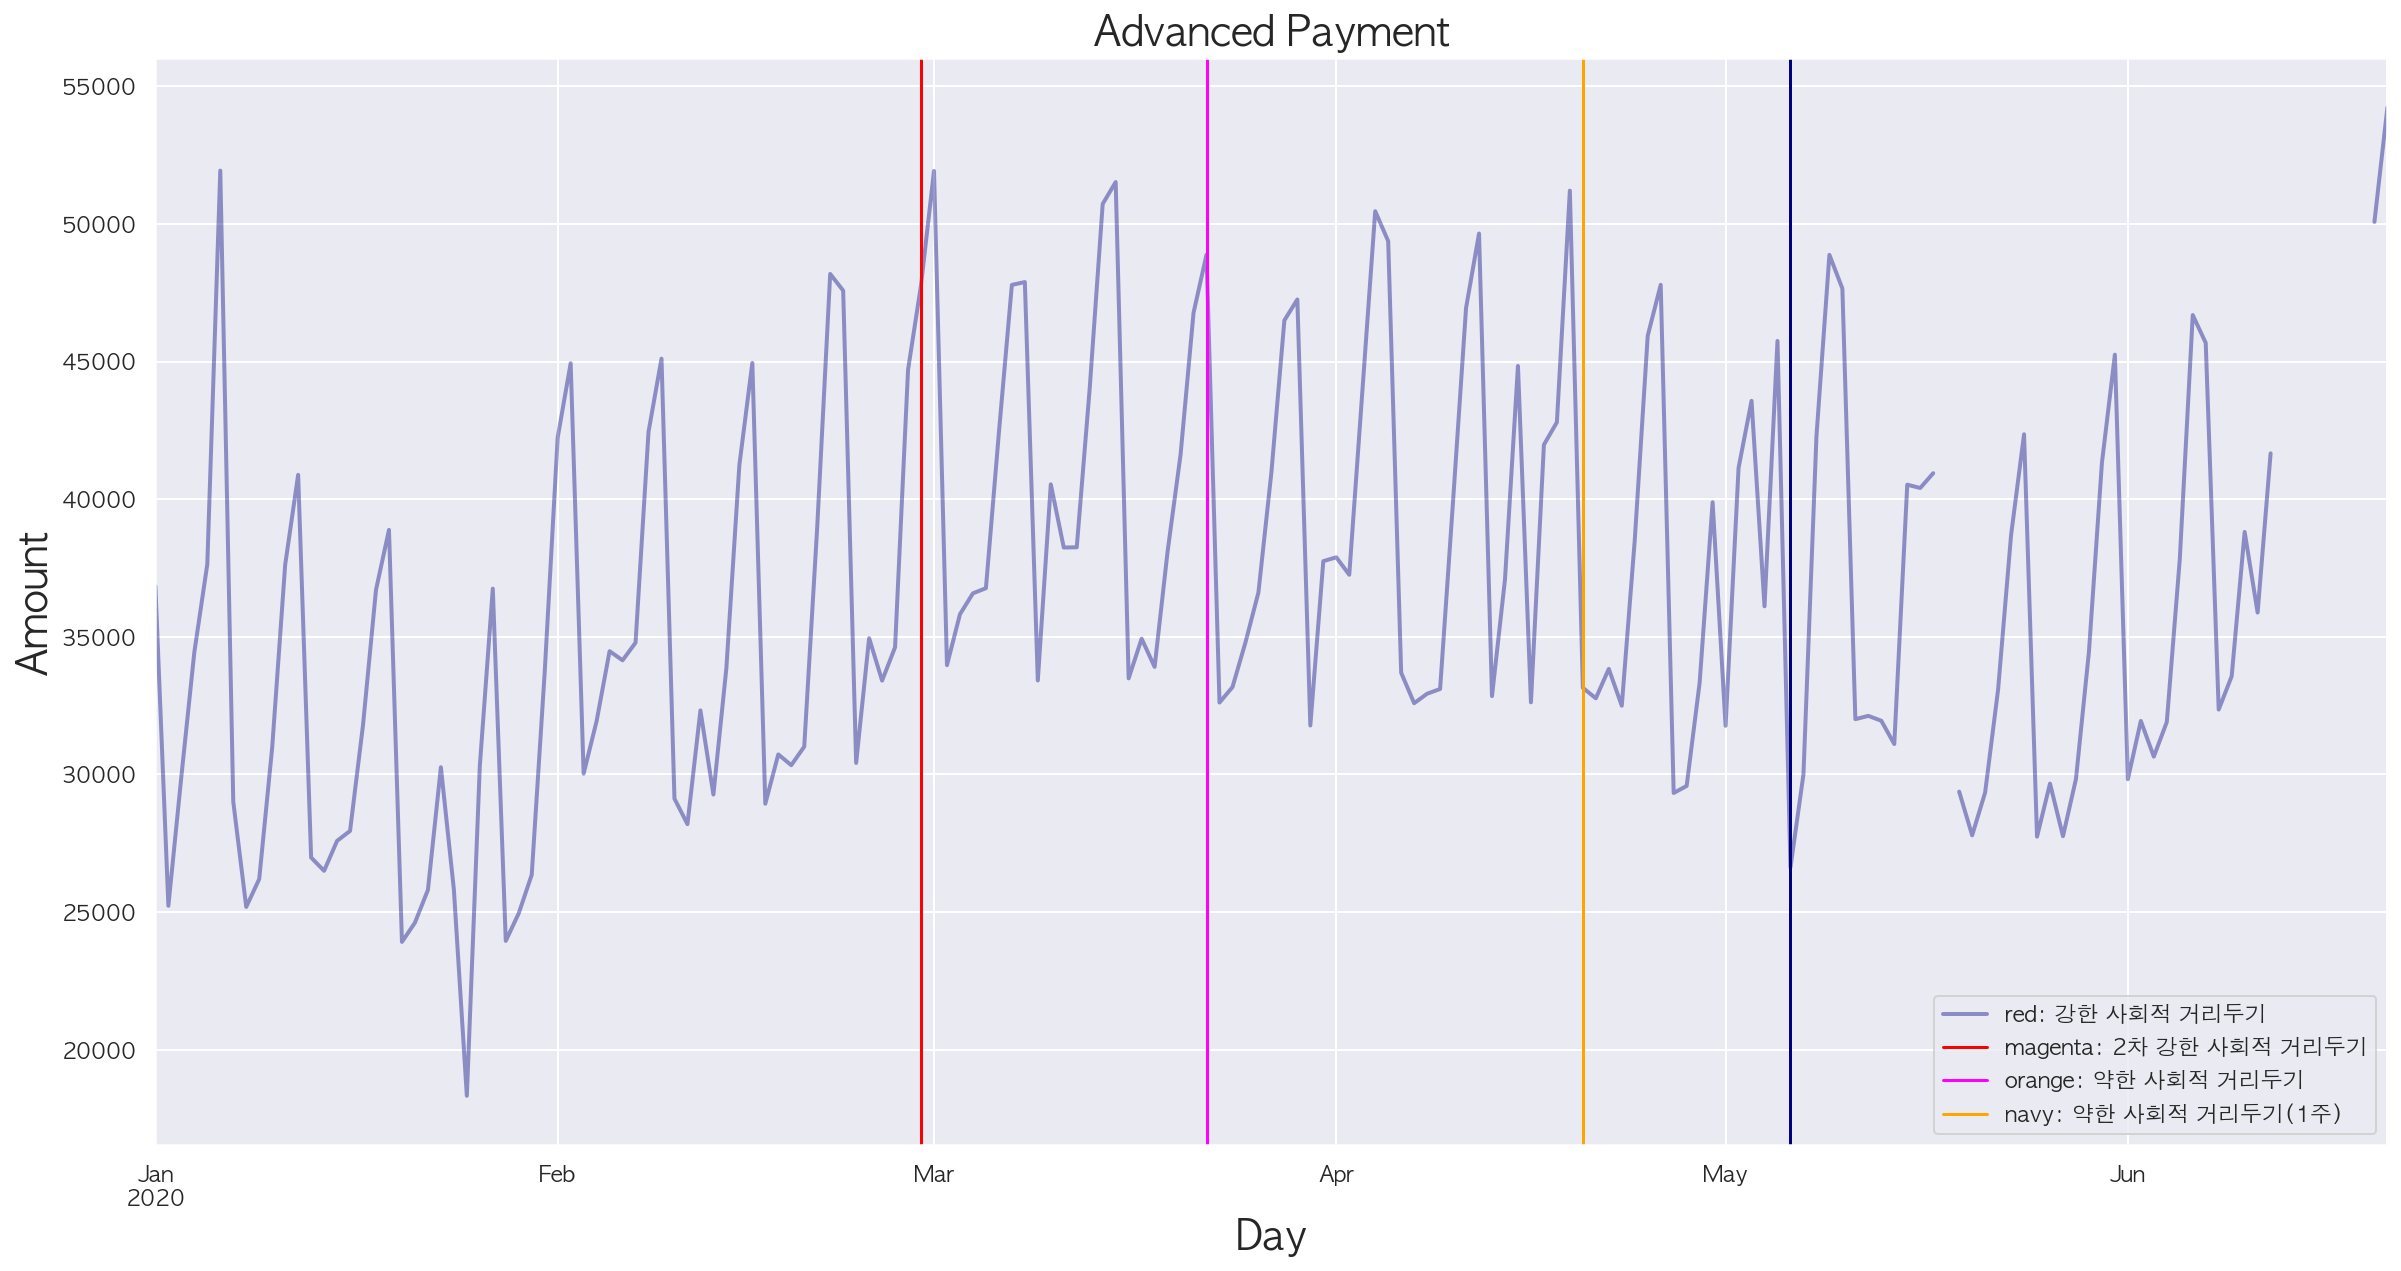

In [19]:
plt.rcParams['font.family'] = 'AppleGothic'
df3.plot(figsize = (20,10), linewidth=2, color='navy', alpha=0.4)
plt.title('Advanced Payment', fontsize= 20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Amount', fontsize=20)

plt.axvline(x='2020-02-29',color='red')
plt.axvline(x='2020-03-22',color='magenta', linestyle='-')
plt.axvline(x='2020-04-20', color='orange')
plt.axvline(x='2020-05-06', color='navy')

plt.legend(['red: 강한 사회적 거리두기', 'magenta: 2차 강한 사회적 거리두기', 'orange: 약한 사회적 거리두기','navy: 약한 사회적 거리두기(1주)'])
plt.show()

#딱히 관련성이 있어보이진 않습니다. 

In [26]:
#코로나로 인해 평소 배달해먹지 않는 음식들의 배달건수가 늘었을 것이라 예상했습니다.그 중 가장 대표적인 것이 아시안/양식, 카페/디저트라 생각되어
#평소에도 많이 시켜먹는 치킨과 그 둘을 비교해보려합니다.
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
DLVR_STORE_INDUTY_NM,,,,,,,,,,,,,,,,,,,,,
치킨,4577985,2020-01-01,C000035,1,C000035,S0032342,4812710600,경상남도,창원시 마산회원구,합성동,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
찜탕,4577986,2020-01-01,C000237,1,C000237,S0021847,4121010200,경기도,광명시,철산동,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
치킨,4577988,2020-01-01,C000129,1,C000129,S0025740,1138010400,서울특별시,은평구,갈현동,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
한식,4577989,2020-01-01,C000029,1,C000043,S0039634,4115010100,경기도,의정부시,의정부동,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
한식,4577991,2020-01-01,C000130,1,C000130,S0002237,4128112800,경기도,고양시 덕양구,행신동,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
야식,10672688,2020-06-21,C000312,1,C000312,S0029529,4125010200,경기도,동두천시,지행동,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
야식,10672689,2020-06-21,C000026,1,C000026,S0026242,1132010800,서울특별시,도봉구,도봉동,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
야식,10672690,2020-06-21,C000130,1,C000130,S0042234,4128112300,경기도,고양시 덕양구,화정동,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN


In [29]:
delivery2 = delivery.drop(['SERIAL_NUMBER','DLVR_RQESTER_ID','DLVR_REQUST_STTUS_VALUE',
                          'DLVR_RCEPT_CMPNY_ID', 'DLVR_STORE_ID', 'DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_SIDO'
                          , 'DLVR_STORE_SIGUNGU','SETLE_KND_VALUE', 'SETLE_CARD_CN','DLVR_RCEPT_TIME', 'DLVR_CARALC_TIME'
                          ,'DLVR_CANCL_TIME' ],axis = 1)

delivery2['Total'] = delivery2['DLVR_AMOUNT']+ delivery2['CALL_RLAY_FEE_AMOUNT']+delivery2['GOODS_AMOUNT']
delivery2

,PROCESS_DT,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,DLVR_COMPT_TIME,Total
DLVR_STORE_INDUTY_NM,,,,,,,,,,,,,,,,,,
치킨,2020-01-01,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,2020-01-01 00:41:37,29590
찜탕,2020-01-01,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2020-01-01 01:31:44,54000
치킨,2020-01-01,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,2020-01-01 00:18:47,26600
한식,2020-01-01,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2020-01-01 01:36:48,24800
한식,2020-01-01,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2020-01-01 01:29:00,38800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
야식,2020-06-21,지행동,NaN,4125056500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D0013004,3000,500,26000,2020-06-21 23:07:47,29500
야식,2020-06-21,도봉동,NaN,1132052100,1.132041e+11,1.135010e+09,서울특별시,노원구,상계동,NaN,1.135063e+09,1.135041e+11,D0006251,3600,55,22000,2020-06-21 23:18:20,25655
야식,2020-06-21,화정동,NaN,4128162100,4.128132e+11,4.128112e+09,경기도,고양시 덕양구,화정동,NaN,4.128162e+09,4.128132e+11,D0012754,3000,300,17000,2020-06-21 23:14:45,20300


In [30]:
Chicken = delivery2.loc[delivery2.index == '치킨']
display(Chicken)

Cafe_Dessert = delivery2.loc[delivery2.index =='카페/디저트']
display(Cafe_Dessert)

Asian = delivery2.loc[delivery2.index =='아시안/양식']
display(Asian)

,PROCESS_DT,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,DLVR_COMPT_TIME,Total
DLVR_STORE_INDUTY_NM,,,,,,,,,,,,,,,,,,
치킨,2020-01-01,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,2020-01-01 00:41:37,29590
치킨,2020-01-01,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,2020-01-01 00:18:47,26600
치킨,2020-01-01,대림동,NaN,1156070000,1.156042e+11,1.156013e+09,서울특별시,영등포구,신길동,NaN,1.156052e+09,1.156031e+11,D0006259,4800,200,17000,2020-01-01 01:23:41,22000
치킨,2020-01-01,광양읍,인서리,4623025000,4.623047e+11,4.623025e+09,전라남도,광양시,광양읍,용강리,4.623025e+09,4.623047e+11,D0006823,3300,300,19000,2020-01-01 00:22:54,22600
치킨,2020-01-01,두산동,NaN,2726064000,2.726042e+11,2.726011e+09,대구광역시,수성구,지산동,NaN,2.726065e+09,2.726042e+11,D0006876,3000,300,18000,2020-01-01 00:24:14,21300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
치킨,2020-06-21,의정부동,NaN,4115052000,4.115032e+11,4.115010e+09,경기도,의정부시,호원동,NaN,4.115054e+09,4.115032e+11,D0009395,5000,300,17000,2020-06-21 23:11:26,22300
치킨,2020-06-21,화정동,NaN,4128162200,4.128132e+11,4.128111e+09,경기도,고양시 덕양구,성사동,NaN,4.128154e+09,4.128144e+11,D0002413,5500,300,24400,2020-06-21 23:31:22,30200
치킨,2020-06-21,나운동,NaN,4513070100,4.513033e+11,4.513014e+09,전라북도,군산시,지곡동,NaN,4.513069e+09,4.513046e+11,D0011833,4000,600,20900,2020-06-21 23:43:56,25500


,PROCESS_DT,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,DLVR_COMPT_TIME,Total
DLVR_STORE_INDUTY_NM,,,,,,,,,,,,,,,,,,
카페/디저트,2020-01-01,지산동,NaN,4122056000,4.122032e+11,4.122011e+09,경기도,평택시,지산동,NaN,4.122055e+09,4.122032e+11,D0007182,3500,300,15900,2020-01-01 01:24:49,19700
카페/디저트,2020-01-01,지산동,NaN,4122056000,4.122032e+11,4.122011e+09,경기도,평택시,독곡동,NaN,4.122056e+09,4.122044e+11,D0007182,3500,300,20700,2020-01-01 01:24:47,24500
카페/디저트,2020-01-01,철산동,NaN,4121060000,4.121032e+11,4.121010e+09,경기도,광명시,철산동,NaN,4.121060e+09,4.121032e+11,D0004012,3800,200,16500,2020-01-01 01:00:18,20500
카페/디저트,2020-01-01,철산동,NaN,4121060000,4.121032e+11,1.153011e+09,서울특별시,구로구,개봉동,NaN,1.153076e+09,1.153041e+11,D0005003,3800,200,17500,2020-01-01 00:44:00,21500
카페/디저트,2020-01-01,지산동,NaN,4122056000,4.122032e+11,4.122010e+09,경기도,평택시,서정동,NaN,4.122052e+09,4.122032e+11,D0007182,3500,300,18400,2020-01-01 00:59:41,22200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
카페/디저트,2020-06-21,읍내동,NaN,4421051000,4.421033e+11,4.421011e+09,충청남도,서산시,석림동,NaN,4.421054e+09,4.421033e+11,D0013288,3500,300,9900,2020-06-21 22:58:23,13700
카페/디저트,2020-06-21,감삼동,NaN,2729055500,2.729031e+11,2.729010e+09,대구광역시,달서구,성당동,NaN,2.729052e+09,2.729042e+11,D0003333,3000,200,15500,2020-06-21 23:10:59,18700
카페/디저트,2020-06-21,일산동,NaN,4213056000,4.213032e+11,4.213011e+09,강원도,원주시,행구동,NaN,4.213065e+09,4.213045e+11,D0000484,4200,0,15500,NaN,19700


,PROCESS_DT,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,DLVR_COMPT_TIME,Total
DLVR_STORE_INDUTY_NM,,,,,,,,,,,,,,,,,,
아시안/양식,2020-01-01,월평동,NaN,3017058600,3.017043e+11,3.017011e+09,대전광역시,서구,월평동,NaN,3.017059e+09,3.017032e+11,D0007177,3500,100,12900,2020-01-01 00:28:42,16500
아시안/양식,2020-01-01,월평동,NaN,3017058600,3.017043e+11,3.017011e+09,대전광역시,서구,월평동,NaN,3.017059e+09,3.017032e+11,D0007177,3500,100,13500,2020-01-01 01:04:10,17100
아시안/양식,2020-01-01,월평동,NaN,3017058600,3.017043e+11,3.020011e+09,대전광역시,유성구,봉명동,NaN,3.020053e+09,3.020020e+11,D0007177,4100,100,15400,2020-01-01 01:18:06,19600
아시안/양식,2020-01-01,이동,NaN,4127151500,4.127144e+11,4.127110e+09,경기도,안산시 상록구,이동,NaN,4.127152e+09,4.127144e+11,D0004641,3000,200,13500,2020-01-01 11:21:42,16700
아시안/양식,2020-01-01,행신동,NaN,4128165000,4.128144e+11,4.128111e+09,경기도,고양시 덕양구,동산동,NaN,4.128158e+09,4.128132e+11,D0002322,6500,300,43200,2020-01-01 11:55:52,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
아시안/양식,2020-06-21,심곡동,NaN,4119060300,4.119032e+11,4.119011e+09,경기도,부천시,상동,NaN,4.119074e+09,4.119032e+11,D0009264,5300,200,17500,2020-06-21 23:00:08,23000
아시안/양식,2020-06-21,심곡동,NaN,4119060300,4.119032e+11,4.119011e+09,경기도,부천시,중동,NaN,4.119074e+09,4.119032e+11,D0013008,4300,300,20500,2020-06-21 23:40:03,25100
아시안/양식,2020-06-21,심곡동,NaN,4119060300,4.119032e+11,4.119011e+09,경기도,부천시,심곡본동,NaN,4.119075e+09,4.119044e+11,D0013059,3300,200,14000,2020-06-21 23:22:57,17500


In [31]:
idx_nw= pd.to_datetime(Chicken['PROCESS_DT'])
b = list(Chicken['Total'])
ts_chicken = Series(b, idx_nw)
display(ts_chicken)

idx_nw2= pd.to_datetime(Cafe_Dessert['PROCESS_DT'])
c= list(Cafe_Dessert['Total'])
ts_dessert = Series(c, idx_nw2)
display(ts_dessert)

idx_nw3= pd.to_datetime(Asian['PROCESS_DT'])
d= list(Asian['Total'])
ts_asian = Series(d, idx_nw3)
display(ts_asian)


PROCESS_DT
2020-01-01    29590
2020-01-01    26600
2020-01-01    22000
2020-01-01    22600
2020-01-01    21300
              ...  
2020-06-21    22300
2020-06-21    30200
2020-06-21    25500
2020-06-21    21000
2020-06-21    27000
Length: 1173238, dtype: int64

PROCESS_DT
2020-01-01    19700
2020-01-01    24500
2020-01-01    20500
2020-01-01    21500
2020-01-01    22200
              ...  
2020-06-21    13700
2020-06-21    18700
2020-06-21    19700
2020-06-21    19400
2020-06-21    23800
Length: 457830, dtype: int64

PROCESS_DT
2020-01-01    16500
2020-01-01    17100
2020-01-01    19600
2020-01-01    16700
2020-01-01    50000
              ...  
2020-06-21    23000
2020-06-21    25100
2020-06-21    17500
2020-06-21    16500
2020-06-21    19260
Length: 109185, dtype: int64

In [32]:
chicken_resample_M = ts_chicken.resample('M').sum()
chicken_resample_M

chicken_resample_W = ts_chicken.resample('W').sum()
chicken_resample_W

Caffe_resample_M = ts_dessert.resample('M').sum()
Caffe_resample_W = ts_dessert.resample('W').sum()


Asian_resample_M = ts_asian.resample('M').sum()
Asian_resample_W = ts_asian.resample('W').sum()




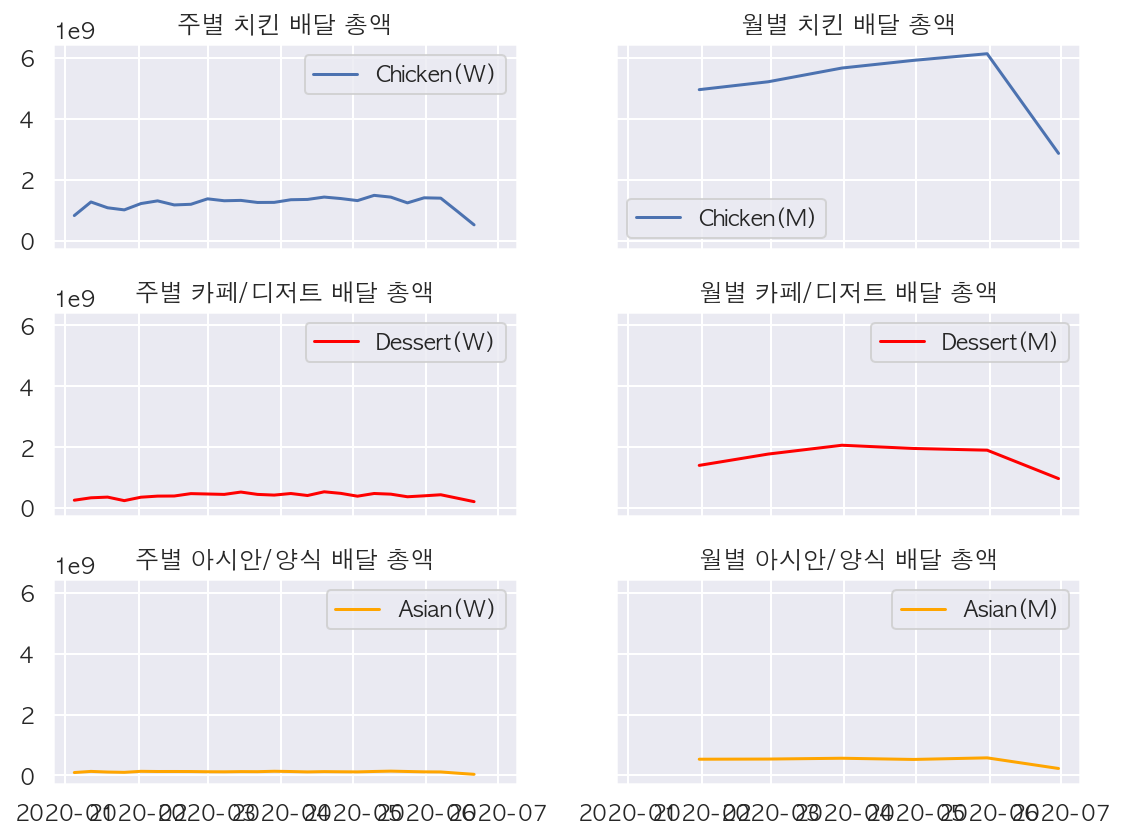

In [33]:
df_chicken= pd.DataFrame()
df_chicken['주별 치킨 배달 총액'] = chicken_resample_W
df_chicken_M= pd.DataFrame()
df_chicken_M['월별 치킨 배달 총액'] = chicken_resample_M

df_caffe_M = pd.DataFrame()
df_caffe_M['월별 카페/디저트 배달 총액'] = Caffe_resample_M
df_caffe = pd.DataFrame()
df_caffe['주별 카페/디저트 배달 총액'] = Caffe_resample_W
 

df_asian_M = pd.DataFrame()
df_asian_M['월별 아시안/양식 배달 총액'] = Asian_resample_M
df_asian = pd.DataFrame()
df_asian['주별 아시안/양식 배달 총액'] = Asian_resample_W
    
fig, ax = plt.subplots(3, 2,figsize=(8,6),sharex=True, sharey=True)
ax[0,0].plot(df_chicken.index,df_chicken['주별 치킨 배달 총액'],label='Chicken(W)')
ax[0,1].plot(df_chicken_M.index,df_chicken_M['월별 치킨 배달 총액'], label='Chicken(M)')
ax[1,0].plot(df_caffe.index, df_caffe['주별 카페/디저트 배달 총액'],label='Dessert(W)',color='red')
ax[1,1].plot(df_caffe_M.index, df_caffe_M['월별 카페/디저트 배달 총액'],label='Dessert(M)',color='red')
ax[2,0].plot(df_asian.index,df_asian['주별 아시안/양식 배달 총액'],label='Asian(W)',color='orange')
ax[2,1].plot(df_asian_M.index,df_asian_M['월별 아시안/양식 배달 총액'],label='Asian(M)',color='orange')

ax[0,0].set_title('주별 치킨 배달 총액')
ax[0,1].set_title('월별 치킨 배달 총액')
ax[1,0].set_title('주별 카페/디저트 배달 총액')
ax[1,1].set_title('월별 카페/디저트 배달 총액')
ax[2,0].set_title('주별 아시안/양식 배달 총액')
ax[2,1].set_title('월별 아시안/양식 배달 총액')

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[2, 0].legend()
ax[2, 1].legend()


plt.tight_layout()
plt.show()


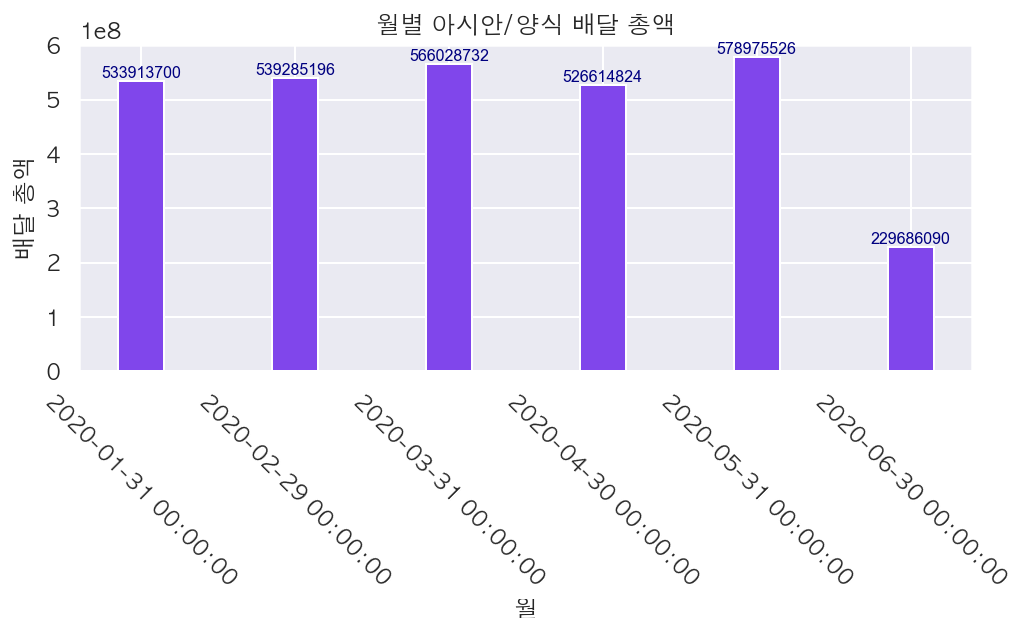

In [35]:
plt.rcParams['font.family'] = 'AppleGothic'

display(df_asian_M['월별 아시안/양식 배달 총액'].plot.bar(color='#8046eb', rot=0, width=0.3,figsize = (8,3)))
plt.ylim(0, 600000000)

plt.title("월별 아시안/양식 배달 총액")
plt.xlabel("월")
plt.ylabel("배달 총액")   
plt.xticks(rotation=-45)
plt.style.use('seaborn')
for x, y in enumerate( list(df_asian_M['월별 아시안/양식 배달 총액']) ):
    txt = "%d" % y
    plt.text(x, y, txt, fontsize=8, color='navy', 
                    horizontalalignment='center', verticalalignment='bottom')

In [36]:
#셋의 배달총액 증감율을 보려고 합니다. 

A_for_change_chicken= list(chicken_resample_M)
A_for_change_dessert = list(Caffe_resample_M)
A_for_change_asian = list(Asian_resample_M)


lst_change_c =[]
for i in range(len(A_for_change_chicken)-2):
    diff = (A_for_change_chicken[i+1] - A_for_change_chicken[i])/ A_for_change_chicken[i]
    diff = diff*100
    i +=1
    print(diff)
    lst_change_c.append(diff)
    
lst_change_c


lst_change_d =[]
for i in range(len(A_for_change_dessert)-2):
    diff = (A_for_change_dessert[i+1] -A_for_change_dessert[i])/ A_for_change_dessert[i]
    diff = diff*100
    i +=1
    print(diff)
    lst_change_d.append(diff)

lst_change_asian =[]
for i in range(len(A_for_change_asian)-2):
    diff = (A_for_change_asian[i+1] -A_for_change_asian[i])/ A_for_change_asian[i]
    diff = diff*100
    i +=1
    print(diff)
    lst_change_asian.append(diff)
    

5.233016445684927
8.651712414532547
4.432467681766704
3.6959235334763982
26.619323286963372
16.34349431524866
-5.1351002580934075
-2.8985170056300054
1.0060607173031897
4.959071044108542
-6.963234509445361
9.94288417524684


In [37]:
dfdf = pd.DataFrame()
dfdf['Asian']=lst_change_asian
dfdf['Dessert/Cafe'] =lst_change_d
dfdf['Chicken'] = lst_change_c

dfdf

,Asian,Dessert/Cafe,Chicken
0,1.006061,26.619323,5.233016
1,4.959071,16.343494,8.651712
2,-6.963235,-5.135100,4.432468
3,9.942884,-2.898517,3.695924


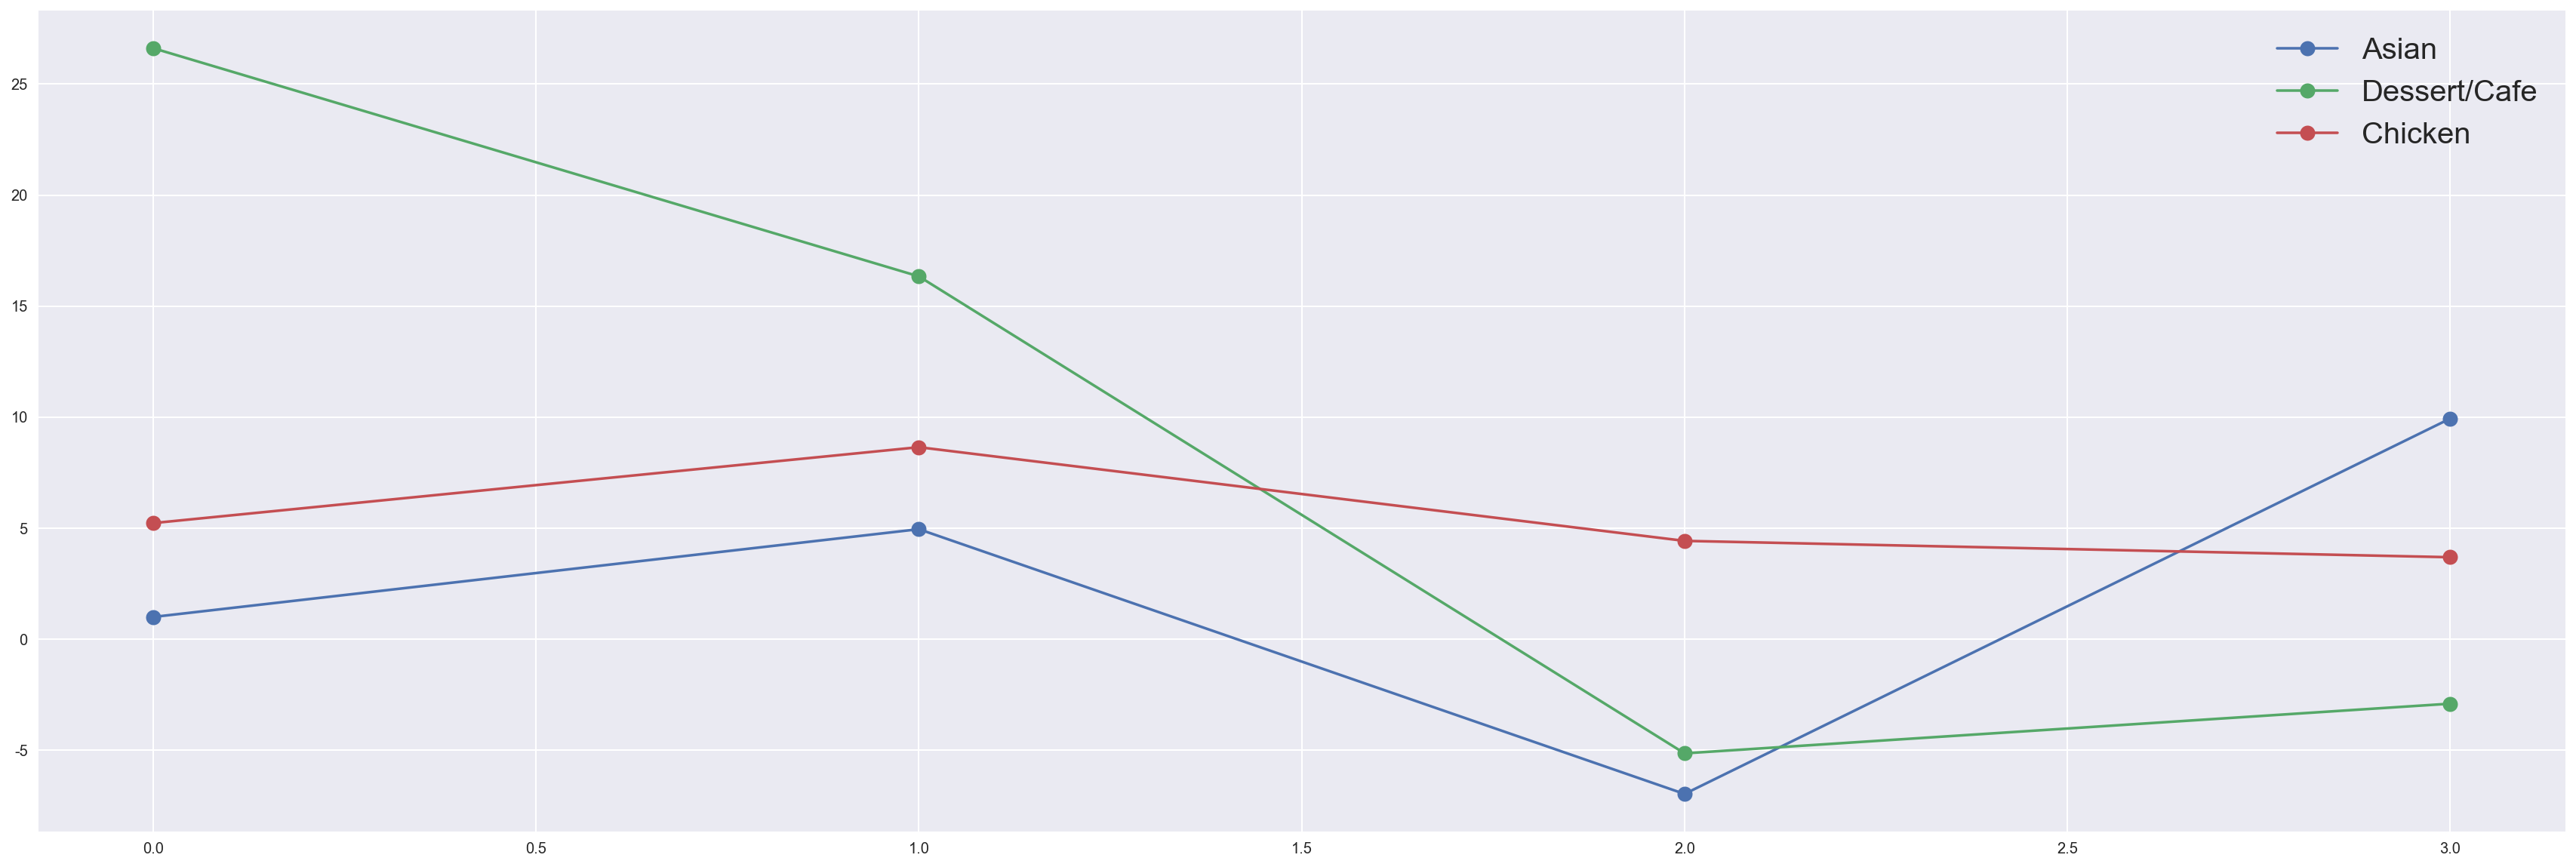

In [38]:
plt.figure(figsize=(30,10))
plt.plot(dfdf,marker='o',markersize=10)
warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
plt.legend(['Asian', 'Dessert/Cafe', 'Chicken'], fontsize=20)

plt.show()

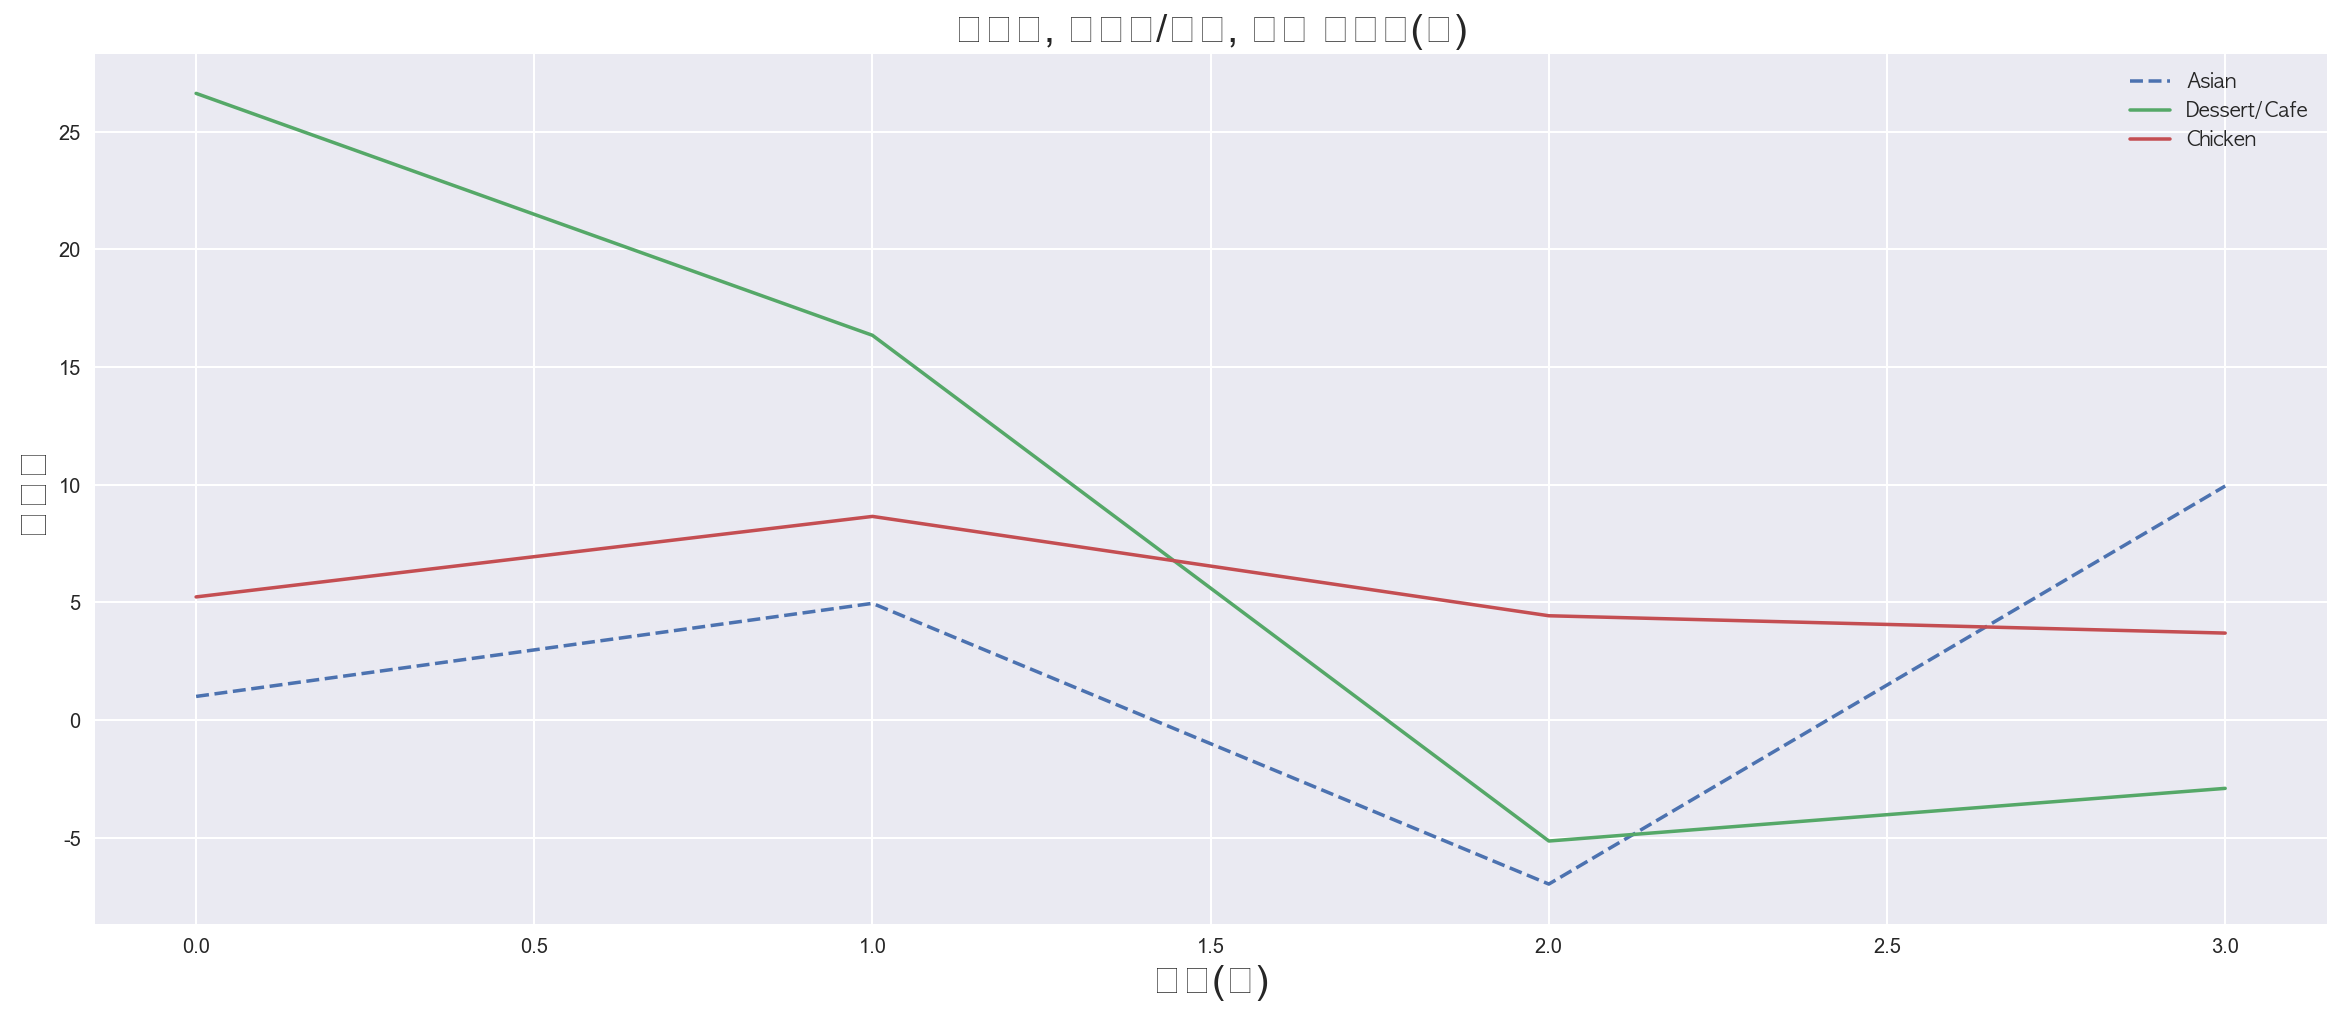

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
plt.rcParams['font.family'] = 'AppleGothic'

ax.set_xlabel('시간(월)', fontsize=20)
ax.set_ylabel('증감율', fontsize=20)
ax.set_title('아시안, 디저트/카페, 치킨 증감율(월)', fontsize=20)
ax.plot(dfdf.index, dfdf['Asian'],label='Asian',linestyle='--')
ax.plot(dfdf.index, dfdf['Dessert/Cafe'],label = 'Dessert/Cafe')
ax.plot(dfdf.index, dfdf['Chicken'], label ='Chicken')
plt.legend()

plt.show()

In [40]:
delivery3 = delivery.groupby('SETLE_KND_VALUE').count()
delivery3['Ratio'] = delivery3['SERIAL_NUMBER']/5158324 *100
delivery3['Ratio']

SETLE_KND_VALUE
1    31.302900
2    58.594381
3    10.102719
Name: Ratio, dtype: float64

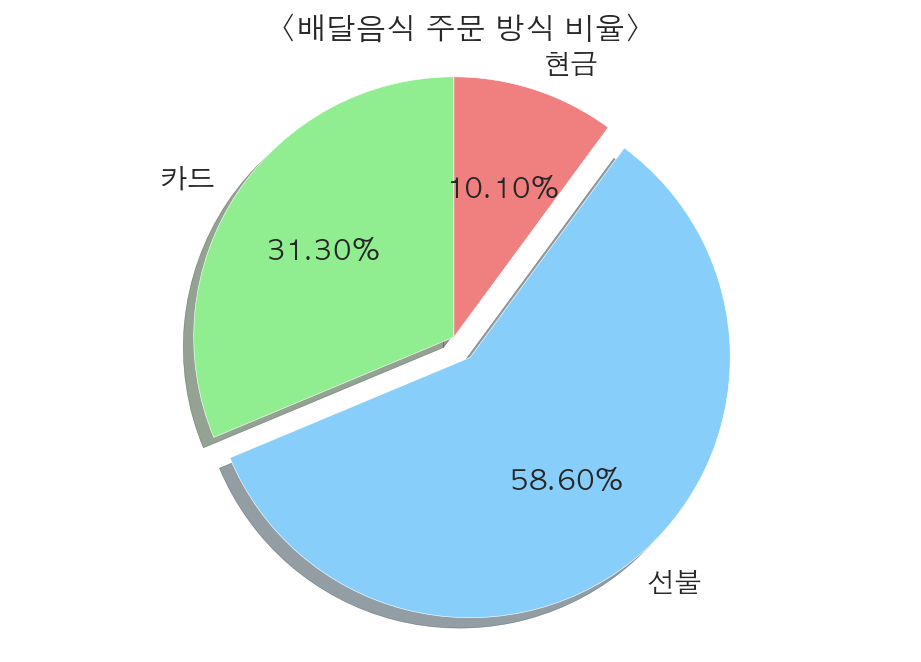

In [41]:
group_sizes= [31.3, 58.6, 10.1]
group_names = ['카드', '선불', '현금']
group_colors = ['lightgreen', 'lightskyblue', 'lightcoral']
group_explodes = (0,0.1, 0) # explode 1st slice

plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('<배달음식 주문 방식 비율>', fontsize=15)
%config InlineBackend.figure_format = 'retina'

plt.show()